## Analisis de Datos

## Regresión logística Titanic

## Javier Alejandro Segura Rodríguez

## Codigo Curso 202016908_78

In [111]:
#Cargar Librerias
#Importamos las librerias
#Se usar para crear objeto DataFrame
import pandas as pd
#Se usa para usar funciones matematicas
import numpy as np
#se usa para visualización de gráficas con mejor visualización
import seaborn as sns
#se usa para visualización de gráficas
import matplotlib.pyplot as plt
#Se usa para la generación de algoritmo de aprendizaje y evaluación del mismo
from sklearn import metrics
#Se usa para dividir el Dataset en dos partes Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [133]:
#Seleccionamos la información relevante para el estudio, para este escenario trataremos de identificar con valores edad, 
#clase del pasajero, genero influyeron en nuestra variable objetivo 

# Seleccionar solo las columnas deseadas
selected_columns = ["PassengerId","Age", "Sex", "Pclass", "Survived"]
dataStudy = data[selected_columns]


In [135]:
# Convertir la columna 'Sex' a valores binarios de manera explícita
dataStudy.loc[:, 'Sex'] = dataStudy['Sex'].map({'male': 1, 'female': 0})

In [137]:
#Verificamos valores nulos
dataStudy.isna().sum()

PassengerId      0
Age            177
Sex              0
Pclass           0
Survived         0
dtype: int64

In [139]:
#Asigno el promedio de la edad a las personas que tienen valores null

# Calcular el promedio de la columna 'Age' excluyendo los NaN
age_mean = dataStudy['Age'].mean()

# Reemplazar los valores NaN de 'Age' con el promedio calculado
dataStudy.loc[:, 'Age'] = dataStudy['Age'].fillna(age_mean)

In [141]:
#Verificamos valores nulos
dataStudy.isna().sum()

PassengerId    0
Age            0
Sex            0
Pclass         0
Survived       0
dtype: int64

In [149]:
dataStudy.head(10)

,PassengerId,Age,Sex,Pclass,Survived
0,1,22.000000,1,3,0
1,2,38.000000,0,1,1
2,3,26.000000,0,3,1
3,4,35.000000,0,1,1
4,5,35.000000,1,3,0
5,6,29.699118,1,3,0
6,7,54.000000,1,1,0
7,8,2.000000,1,3,0
8,9,27.000000,0,3,1
9,10,14.000000,0,2,1


In [151]:
#obtener resumen estadistico
dataStudy.describe()

,PassengerId,Age,Pclass,Survived
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,2.308642,0.383838
std,257.353842,13.002015,0.836071,0.486592
min,1.000000,0.420000,1.000000,0.000000
25%,223.500000,22.000000,2.000000,0.000000
50%,446.000000,29.699118,3.000000,0.000000
75%,668.500000,35.000000,3.000000,1.000000
max,891.000000,80.000000,3.000000,1.000000


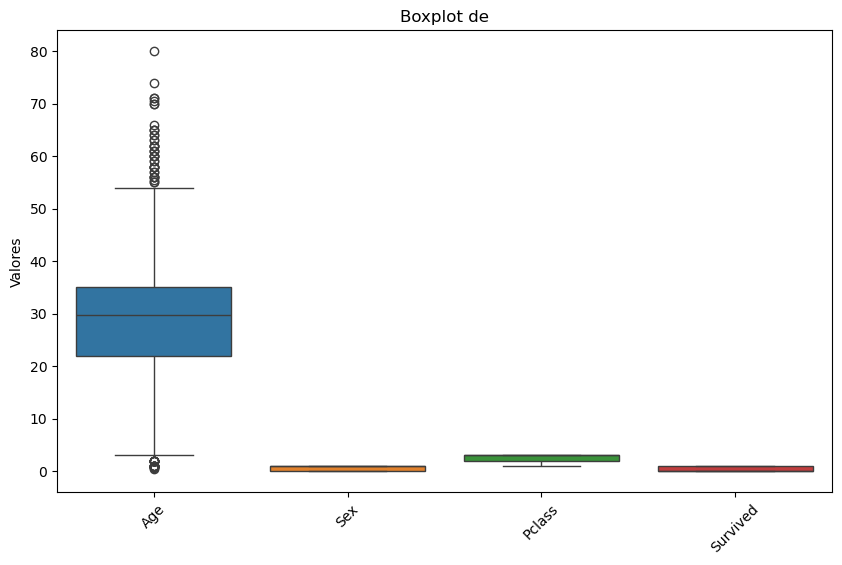

In [153]:
 plt.figure(figsize=(10,6))
sns.boxplot(data=dataStudy[["Age", "Sex", "Pclass", "Survived"]])
plt.xticks(rotation=45)
plt.title("Boxplot de")
plt.ylabel("Valores")
palette='tab10'
plt.show()

In [155]:
dataStudy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Age          891 non-null    float64
 2   Sex          891 non-null    object 
 3   Pclass       891 non-null    int64  
 4   Survived     891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [157]:
dataStudy["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [159]:
dataStudy[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [161]:
#porcentaje de datos para entrenamimento (train)=75% y prueba 25%
#se crean variables X y Y para almacenar la informacion del entranamiento

X = dataStudy.drop('Survived',axis=1)#se cargan los datos de train sin los datos de la columna Survived
Y = dataStudy['Survived'] # Se cargan los datos de train con los datos de la columna Survived

#La funcion train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25 ,stratify = Y, random_state = 0)

In [163]:
print (x_train)

     PassengerId        Age Sex  Pclass
671          672  31.000000   1       1
417          418  18.000000   0       2
634          635   9.000000   0       3
323          324  22.000000   0       2
379          380  19.000000   1       3
..           ...        ...  ..     ...
131          132  20.000000   1       3
490          491  29.699118   1       3
528          529  39.000000   1       3
48            49  29.699118   1       3
80            81  22.000000   1       3

[668 rows x 4 columns]


In [165]:
print (y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [167]:
#Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") #libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (x_train,y_train)

#crea el modelo de prediccion
prediccion = modelo_regresion.predict(x_test)# la funcion predict predice los valores a partir del conjunto de datos de validacion

In [169]:
print (prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [171]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.75      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



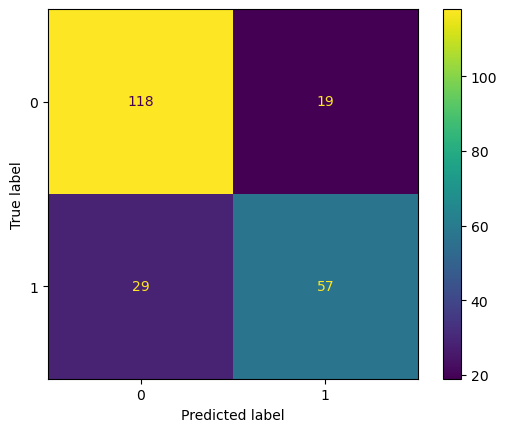

In [173]:
cm = confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()